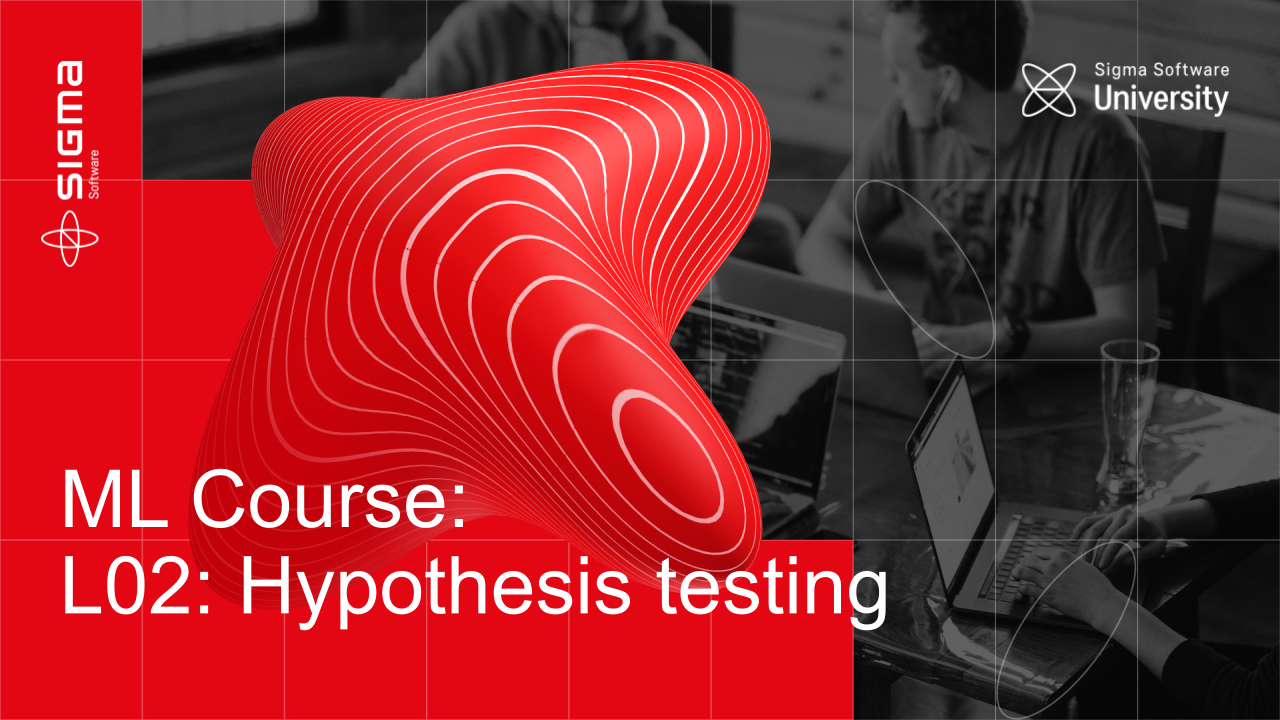

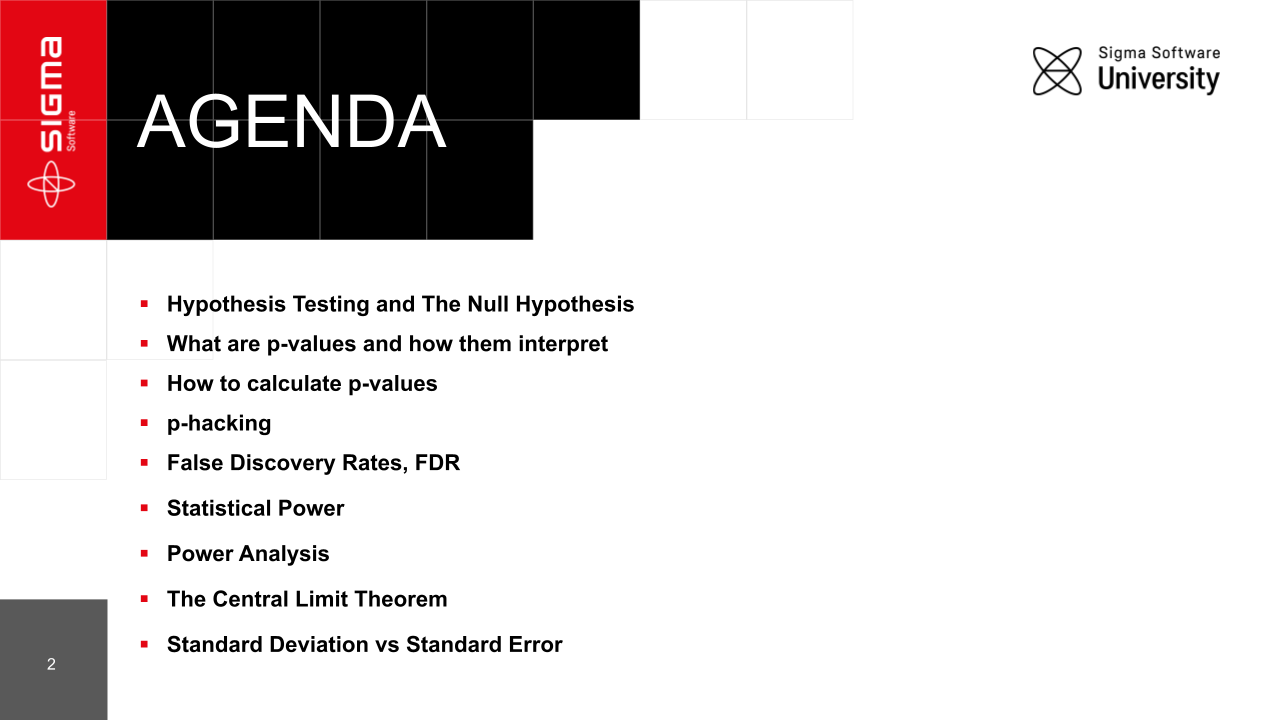

## 1. Hypothesis Testing and The Null Hypothesis

Hypothesis testing is a statistical framework for making inferences about populations based on sample data. 
At its core is the **null hypothesis (H₀)** — a default assumption that there is no effect or difference. 
For example, if we're testing a new drug, the null hypothesis might state that the drug has no effect compared to a placebo. 
We then collect data and calculate a test statistic to evaluate whether the observed effect could reasonably occur under the null hypothesis.

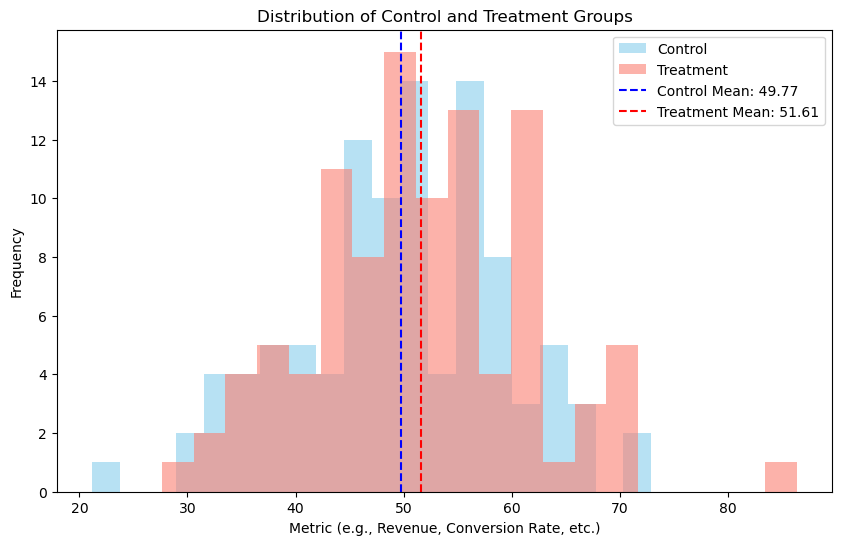

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(40)

# Simulated data
control = np.random.normal(50, 10, 100)
treatment = np.random.normal(52, 10, 100)

# Plot distributions
plt.figure(figsize=(10,6))
plt.hist(control, bins=20, alpha=0.6, label="Control", color='skyblue')
plt.hist(treatment, bins=20, alpha=0.6, label="Treatment", color='salmon')
plt.axvline(control.mean(), color='blue', linestyle='--', label=f"Control Mean: {control.mean():.2f}")
plt.axvline(treatment.mean(), color='red', linestyle='--', label=f"Treatment Mean: {treatment.mean():.2f}")
plt.title("Distribution of Control and Treatment Groups")
plt.xlabel("Metric (e.g., Revenue, Conversion Rate, etc.)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Hypothesis Testing

We want to test whether there is a difference between the control and treatment groups.

**Null Hypothesis ($H_0$):**  
$$ H_0: \mu_1 = \mu_2 $$

**Alternative Hypothesis ($H_a$):**  
$$ H_a: \mu_1 \ne \mu_2 $$

**Test Statistic (Two-sample t-test):**

$$
t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

Where:  
- $\bar{X}_i$ is the sample mean of group $i$
- $s_i$ is the sample standard deviation of group $i$
- $n_i$ is the sample size of group $i$

In [2]:
# Calculate t-statistic manually
mean_diff = np.mean(control) - np.mean(treatment)
var_control = np.var(control, ddof=1)
var_treatment = np.var(treatment, ddof=1)
n_control = len(control)
n_treatment = len(treatment)

# Standard error
se = np.sqrt(var_control/n_control + var_treatment/n_treatment)
t_statistic = mean_diff / se

print(f"Manual t-statistic: {t_statistic:.3f}")

Manual t-statistic: -2.477


The test statistic tells us how many standard errors away the observed difference between the two groups is from zero (i.e., from no difference).

If:

$t≈0$ → The difference between the two group means is small, likely due to random chance.

$∣t∣$ becomes large → The observed difference is less likely to have occurred by chance under the null hypothesis.

The larger the absolute value of t, the stronger the evidence against $H0$

| Test                             | Use Case                                           | Data Type                      |
| -------------------------------- | -------------------------------------------------- | ------------------------------ |
| **t-test (independent samples)** | Compare means of two independent groups            | Continuous, Normal-ish         |
| **paired t-test**                | Compare means of same group before/after treatment | Continuous, paired samples     |
| **Welch’s t-test**               | Like t-test but allows unequal variances           | Continuous                     |
| **Mann-Whitney U test**          | Non-parametric version of t-test                   | Continuous/Ordinal, non-normal |
| **Chi-square test**              | Compare proportions / categorical data             | Categorical                    |
| **ANOVA**                        | Compare means of 3+ groups                         | Continuous                     |
| **Kruskal-Wallis test**          | Non-parametric ANOVA                               | Continuous/Ordinal             |
| **Fisher’s Exact Test**          | Small sample sizes with categorical data           | Categorical                    |
| **Z-test**                       | For large samples (n > 30), known variance         | Continuous                     |


In [3]:
from scipy.stats import ttest_ind

# Calculate p-value using scipy
t_stat, p_value = ttest_ind(control, treatment)
print(f"scipy t-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

scipy t-statistic: -2.477, p-value: 0.014


## 2. What are p-values and how to interpret them

The **p-value** measures the probability of observing data as extreme as, or more extreme than, what was actually observed — assuming the null hypothesis is true. 
A small p-value (typically less than 0.05) suggests that the observed data is unlikely under the null, leading us to consider rejecting it. 
However, it is not the probability that the null hypothesis is true — a common misconception.

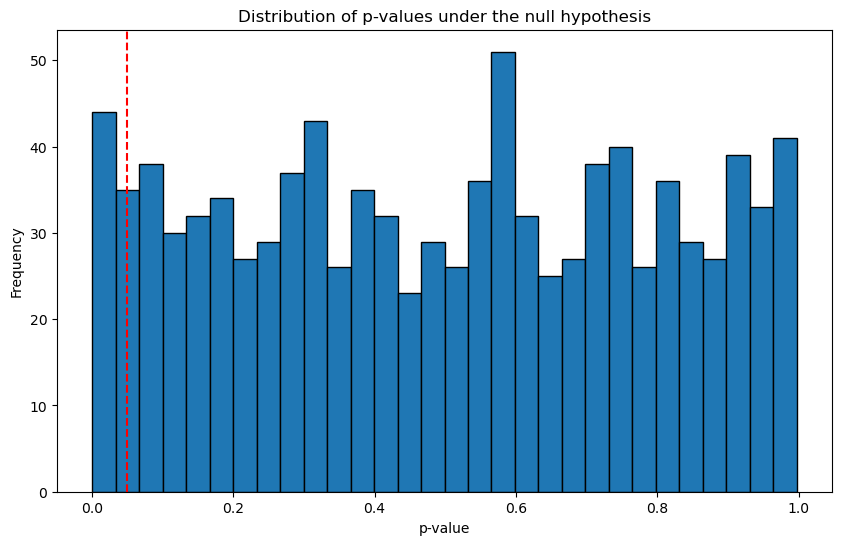

In [4]:
p_values = []
for _ in range(1000):
    g1 = np.random.normal(50, 10, 30)
    g2 = np.random.normal(50, 10, 30)
    _, p = ttest_ind(g1, g2)
    p_values.append(p)

plt.figure(figsize=(10, 6))

plt.hist(p_values, bins=30, edgecolor='k')
plt.axvline(0.05, color='red', linestyle='--')
plt.title('Distribution of p-values under the null hypothesis')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.show()

## 3. How to calculate p-values

While software often computes p-values for you, it’s important to understand how they are derived. 
For many tests, such as the t-test, the p-value is calculated from a test statistic and its associated probability distribution. 

### Normal Distribution Probability Density Function (PDF)

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left( - \frac{(x - \mu)^2}{2\sigma^2} \right)
$$

where:  
- $( \mu $) is the mean  
- $( \sigma $) is the standard deviation  

---

### Student's t-Distribution Probability Density Function (PDF)

$$
f(t) = \frac{\Gamma\left(\frac{\nu + 1}{2}\right)}{\sqrt{\nu \pi} \, \Gamma\left(\frac{\nu}{2}\right)} \left(1 + \frac{t^2}{\nu}\right)^{-\frac{\nu + 1}{2}}
$$

where:  
- $( t $) is the value of the t-statistic  
- $( \nu $) (or \( df \)) is degrees of freedom  
- $( \Gamma $) is the Gamma function  



### Why t-statistic instead of normal distribution?

| Situation                                                  | Use                     |
| ---------------------------------------------------------- | ----------------------- |
| Population standard deviation known                        | Normal distribution     |
| Population standard deviation unknown (almost always true) | t-distribution          |
| Large sample size (e.g. $n > 30$)                          | t-distribution ≈ normal |


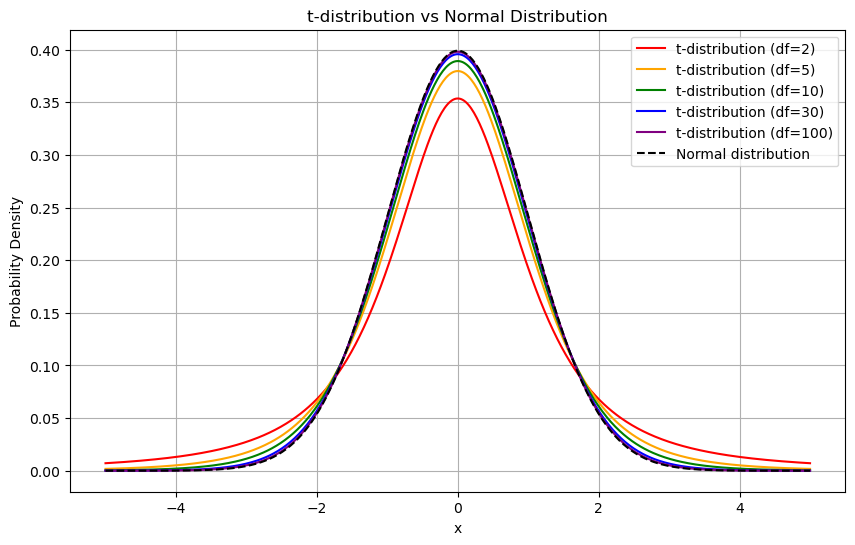

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

x = np.linspace(-5, 5, 500)

# t-distributions with different degrees of freedom
dfs = [2, 5, 10, 30, 100]
colors = ['red', 'orange', 'green', 'blue', 'purple']

plt.figure(figsize=(10, 6))

# Plot t-distributions
for df, color in zip(dfs, colors):
    plt.plot(x, t.pdf(x, df), label=f't-distribution (df={df})', color=color)

# Plot standard normal distribution
plt.plot(x, norm.pdf(x), label='Normal distribution', color='black', linestyle='--')

plt.title('t-distribution vs Normal Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

### Degrees of Freedom for Student's t-test (Equal Variances)

When the population variances are assumed to be equal, the degrees of freedom is calculated as:

$$
df = n_1 + n_2 - 2
$$

where:
- $n_1 $ = sample size of group 1
- $n_2 $ = sample size of group 2


In [6]:
df = 100 + 100 - 2

print(f"Degrees of freedom: {df:.2f}")

Degrees of freedom: 198.00


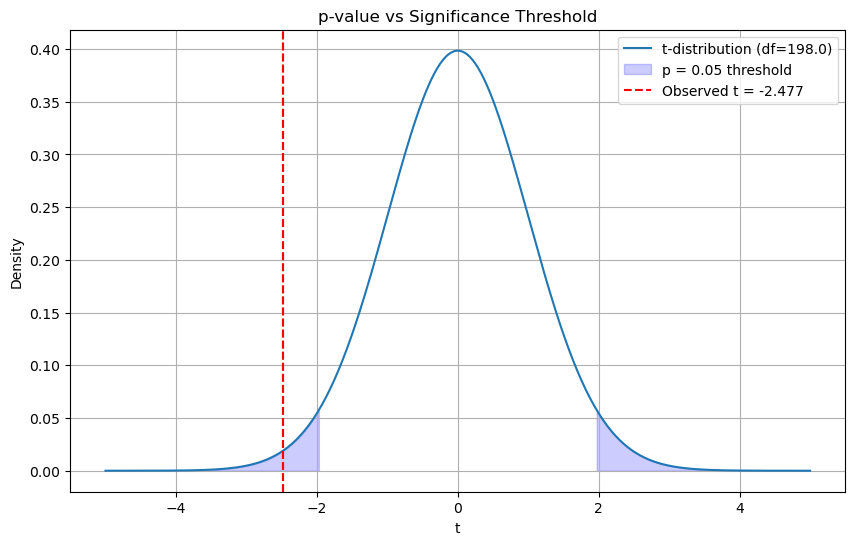

In [7]:
# Generate x values for t-distribution plot
x = np.linspace(-5, 5, 500)
y = t.pdf(x, df)

# Critical t value for two-tailed test at alpha = 0.05
alpha = 0.05
t_critical = t.ppf(1 - alpha/2, df)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f't-distribution (df={df:.1f})')

# Critical region shading (for p=0.05 threshold)
x_crit_right = np.linspace(t_critical, 5, 100)
plt.fill_between(x_crit_right, t.pdf(x_crit_right, df), color='blue', alpha=0.2, label='p = 0.05 threshold')
x_crit_left = np.linspace(-5, -t_critical, 100)
plt.fill_between(x_crit_left, t.pdf(x_crit_left, df), color='blue', alpha=0.2)

# Lines
plt.axvline(t_statistic, color='red', linestyle='--', label=f'Observed t = {t_statistic:.3f}')
plt.axvline(-abs(t_statistic), color='red', linestyle='--')

plt.title('p-value vs Significance Threshold')
plt.xlabel('t')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

## Calculating p-value from the test statistic

After we calculate the test statistic \( t \), we compute the p-value to evaluate the strength of evidence against the null hypothesis.

For a two-tailed t-test, the p-value is calculated as:

$$
p = 2 \times P(T > |t|)
$$

Where:  
- $( T $) is a t-distributed random variable with degrees of freedom $( df $).
- $( |t| $) is the absolute value of the calculated test statistic.

| Name | Formula                   | Meaning    |
| ---- | ------------------------- | ---------- |
| CDF  | $F(t) = P(T \leq t)$      | Left-tail  |
| SF   | $\text{sf}(t) = P(T > t)$ | Right-tail |


This probability can be computed using the **survival function** of the t-distribution:

$$
p = 2 \times \text{sf}(|t|, df)
$$

Where:  
- $( \text{sf} $) is the survival function, which equals $( 1 - \text{cdf} $).
- $( df $) is the degrees of freedom.
- $( T $) is the t-distribution.
- $( |t| $) is the absolute value of the observed test statistic.

---

### Interpretation

- A small p-value (typically < 0.05) indicates strong evidence against the null hypothesis — we may reject $( H_0 $).
- A large p-value suggests insufficient evidence to reject $( H_0 $).


In [8]:
# Manual p-value calculation
p_manual = 2 * t.sf(np.abs(t_statistic), df) # Note t.sf is survival function
print(f"Manual p-value: {p_manual:.4f}")

Manual p-value: 0.0141


In [9]:
print(f"scipy t-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

scipy t-statistic: -2.477, p-value: 0.014


#### Question time

## 4. p-hacking

**p-hacking** refers to manipulating data or analyses until statistically significant results are found — 
often by running multiple tests and only reporting the "successful" ones. This inflates the risk of false positives. 
In this simulation, we show how running multiple comparisons can lead to a significant result purely by chance, even when no real effect exists.

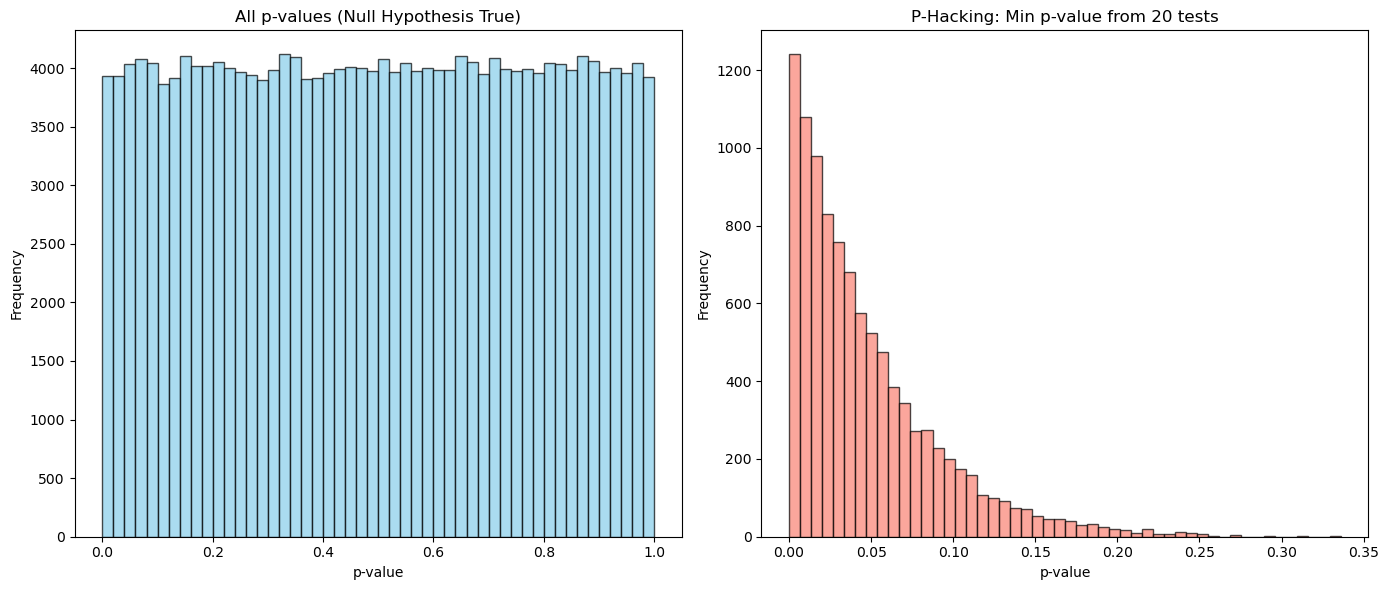

In [10]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

n_experiments = 10000
n_p_hacks = 20  # number of "tries" before picking p-value

# Simulate p-values under null hypothesis (uniform(0,1))
p_values_all = np.random.uniform(0, 1, size=(n_experiments, n_p_hacks))

# P-hacker picks the minimum p-value from each set of tries
p_values_min = p_values_all.min(axis=1)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(p_values_all.flatten(), bins=50, color='skyblue', edgecolor='k', alpha=0.7)
plt.title('All p-values (Null Hypothesis True)')
plt.xlabel('p-value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(p_values_min, bins=50, color='salmon', edgecolor='k', alpha=0.7)
plt.title(f'P-Hacking: Min p-value from {n_p_hacks} tests')
plt.xlabel('p-value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## 5. False Discovery Rates (FDR)

When performing many hypothesis tests, some will be statistically significant just by chance. 
The **False Discovery Rate (FDR)** is the expected proportion of false positives among the results deemed significant. 
The **Benjamini-Hochberg** procedure controls the FDR and is commonly used in genomics, psychology and other fields where many tests run simultaneously.

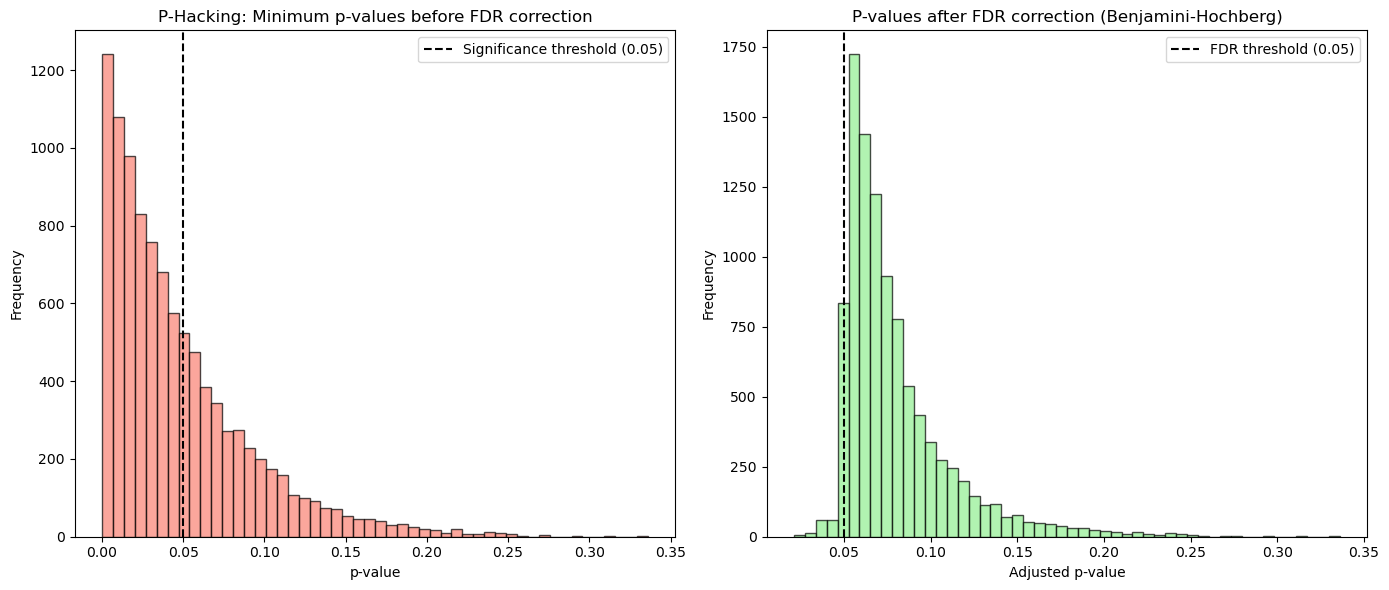

Number of significant p-values before FDR correction: 0.6377
Number of significant p-values after FDR correction: 0.0314


In [11]:
from statsmodels.stats.multitest import multipletests


# Apply FDR correction (Benjamini-Hochberg)
rej, pvals_corrected, _, _ = multipletests(p_values_min, alpha=0.05, method='fdr_bh')

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(p_values_min, bins=50, color='salmon', edgecolor='k', alpha=0.7)
plt.axvline(0.05, color='black', linestyle='--', label='Significance threshold (0.05)')
plt.title('P-Hacking: Minimum p-values before FDR correction')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(pvals_corrected, bins=50, color='lightgreen', edgecolor='k', alpha=0.7)
plt.axvline(0.05, color='black', linestyle='--', label='FDR threshold (0.05)')
plt.title('P-values after FDR correction (Benjamini-Hochberg)')
plt.xlabel('Adjusted p-value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Print summary
print(f"Number of significant p-values before FDR correction: {(p_values_min < 0.05).sum()/10000}")
print(f"Number of significant p-values after FDR correction: {rej.sum()/10000}")


#### Question time

## 6. Statistical Power

**Statistical power** is the probability that a test correctly rejects a false null hypothesis (i.e., detects a true effect). 
It depends on factors such as effect size, sample size, and significance level. 
A low-power study is likely to miss real effects, while high power increases the chances of detecting true differences when they exist.

What is statistical power?
Statistical power is the probability that a test correctly rejects a false null hypothesis — in other words, the probability of detecting a true effect when it exists. It's 
$ 1−β $, where 
$ β $ is the probability of a Type II error (false negative).

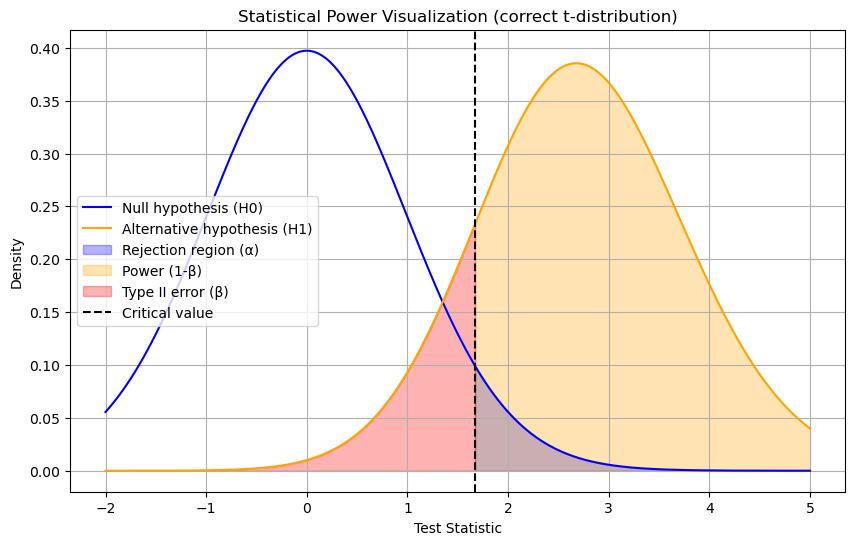

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, nct

# Parameters
alpha = 0.05
effect_size = 0.7  # Cohen's d
n = 30  # sample size per group

# Degrees of freedom
df = 2 * n - 2

# Standard error assuming sigma=1
se = np.sqrt(2 / n)

# Non-centrality parameter
ncp = effect_size / se

# Critical value for one-sided t-test
crit_val = t.ppf(1 - alpha, df)

# Create range of test statistics to plot
x = np.linspace(-2, 5, 500)

# Null distribution: central t with df degrees of freedom
null_dist = t.pdf(x, df)

# Alternative distribution: non-central t (use positional argument for ncp)
alt_dist = nct.pdf(x, df, ncp)

plt.figure(figsize=(10, 6))
plt.plot(x, null_dist, label='Null hypothesis (H0)', color='blue')
plt.plot(x, alt_dist, label='Alternative hypothesis (H1)', color='orange')

# Shade rejection region (Type I error)
x_fill_reject = np.linspace(crit_val, x[-1], 100)
plt.fill_between(x_fill_reject, 0, t.pdf(x_fill_reject, df), color='blue', alpha=0.3, label='Rejection region (α)')

# Shade power region (correct rejection)
x_fill_power = np.linspace(crit_val, x[-1], 100)
plt.fill_between(x_fill_power, 0, nct.pdf(x_fill_power, df, ncp), color='orange', alpha=0.3, label='Power (1-β)')

# Shade Type II error region
x_fill_beta = np.linspace(x[0], crit_val, 100)
plt.fill_between(x_fill_beta, 0, nct.pdf(x_fill_beta, df, ncp), color='red', alpha=0.3, label='Type II error (β)')

plt.axvline(crit_val, color='black', linestyle='--', label='Critical value')

plt.title('Statistical Power Visualization using t-distribution')
plt.xlabel('Test Statistic')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


## Statistical Power for Two-Sample t-Test

We are estimating power for a two-sided independent two-sample t-test.

### Key formulas:

- **Standard error (SE):**

$$
SE = \sigma \cdot \sqrt{\frac{2}{n}}
$$

Assuming standardized data with \(\sigma = 1\), we simplify:

$$
SE = \sqrt{\frac{2}{n}}
$$

- **Non-centrality parameter (NCP):**

$$
\text{NCP} = \frac{\Delta}{SE} = \frac{\Delta}{\sqrt{2 / n}} 
$$

Where $(\Delta$) is the true difference in means (effect size).

- **Critical t-value (two-tailed):**

$$
t_{crit} = t_{1 - \alpha/2, \, df}
$$

Where $(df = 2n - 2$).

- **Statistical power:**

$$
\text{Power} = 1 - F_{nct}(t_{crit}, df, NCP) + F_{nct}(-t_{crit}, df, NCP)
$$

Where $(F_{nct}$) is the cumulative distribution function of the non-central t-distribution.

### Intuition:

- Power is the probability that, given a true effect exists, we successfully reject the null hypothesis.
- Larger sample sizes, larger effect sizes, or higher alpha lead to higher power.
- The non-central t-distribution accounts for the true mean shift away from 0 under the alternative hypothesis.



## One-sided vs Two-sided t-test power

- For a two-sided test, we split alpha across both tails:

$$
t_{crit} = t_{1 - \frac{\alpha}{2}, df}
$$

$$
\text{Power} = 1 - F_{nct}(t_{crit}, df, NCP) + F_{nct}(-t_{crit}, df, NCP)
$$

- For a one-sided test, all alpha is placed in one tail:

$$
t_{crit} = t_{1 - \alpha, df}
$$

$$
\text{Power} = 1 - F_{nct}(t_{crit}, df, NCP)
$$

- One-sided tests generally have **higher power** for same sample size and effect size, because they require smaller critical t-values.


In [82]:
import numpy as np
from scipy.stats import nct, t

def power_ttest_two_sample(alpha, effect_size, n_per_group, two_sided=True):
    """
    Calculate statistical power for a two-sample independent t-test.
    
    Parameters:
    - alpha: significance level
    - effect_size: Cohen's d
    - n_per_group: sample size per group
    - two_sided: whether test is two-sided or one-sided
    
    Returns:
    - power
    """
    df = 2 * n_per_group - 2
    se = np.sqrt(2 / n_per_group)
    ncp = effect_size / se

    if two_sided:
        t_crit = t.ppf(1 - alpha / 2, df)
        power = 1 - nct.cdf(t_crit, df, ncp) + nct.cdf(-t_crit, df, ncp)
    else:
        t_crit = t.ppf(1 - alpha, df)
        power = 1 - nct.cdf(t_crit, df, ncp)

    return power

print(f"Calculated Power: {power_ttest_two_sample(0.05, 0.7, 30, two_sided=False):.4f}")

Calculated Power: 0.8495


Alternatively, we can use statsmodels to calculate the power

In [84]:
import statsmodels.stats.power as smp

# Create a power analysis object
analysis = smp.TTestIndPower()

# Calculate power
power = analysis.solve_power(effect_size=effect_size,
                             nobs1=n,
                             alpha=alpha,
                             alternative='larger',
                             power=None) # Set the parameter you want to solve for to None

print(f"Calculated Power: {power:.4f}")

Calculated Power: 0.8495


## 7. Power Analysis

Before conducting an experiment, it's often useful to determine how large your sample needs to be to reliably detect an effect. 
This is the goal of **power analysis** — it helps researchers plan studies with adequate sensitivity to identify meaningful results, reducing the risk of wasted effort or misleading conclusions.

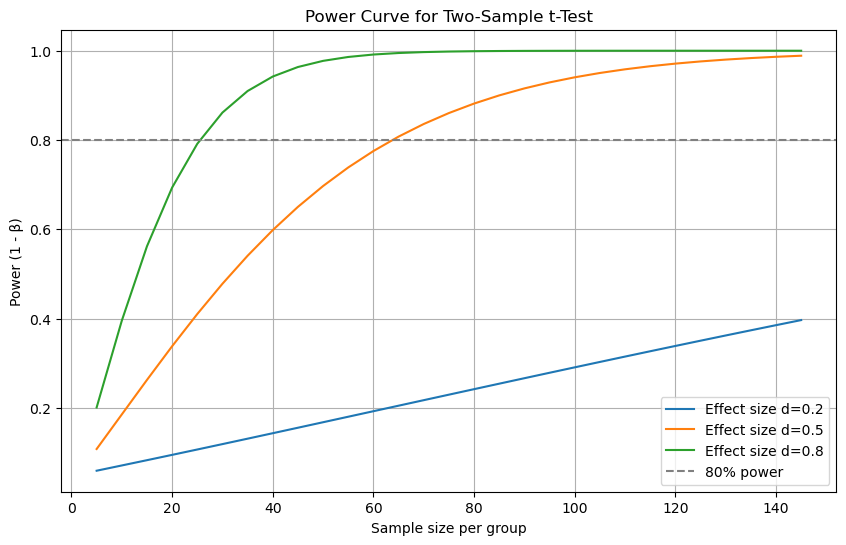

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nct, t

# Function to compute power for two-sample t-test
def power_ttest_two_sample(alpha, effect_size, n_per_group):
    df = 2 * n_per_group - 2
    se = np.sqrt(2 / n_per_group)  # standard error for two-sample test with sigma=1
    ncp = effect_size / se
    t_crit = t.ppf(1 - alpha/2, df)
    power = 1 - nct.cdf(t_crit, df, ncp) + nct.cdf(-t_crit, df, ncp)
    return power

# Parameters
alpha = 0.05
sample_sizes = np.arange(5, 150, 5)
effect_sizes = [0.2, 0.5, 0.8]  # small, medium, large (Cohen's conventions)

plt.figure(figsize=(10, 6))
for es in effect_sizes:
    powers = [power_ttest_two_sample(alpha, es, n) for n in sample_sizes]
    plt.plot(sample_sizes, powers, label=f"Effect size d={es}")

plt.axhline(0.8, color='gray', linestyle='--', label='80% power')
plt.xlabel("Sample size per group")
plt.ylabel("Power (1 - β)")
plt.title("Power Curve for Two-Sample t-Test")
plt.legend()
plt.grid(True)
plt.show()


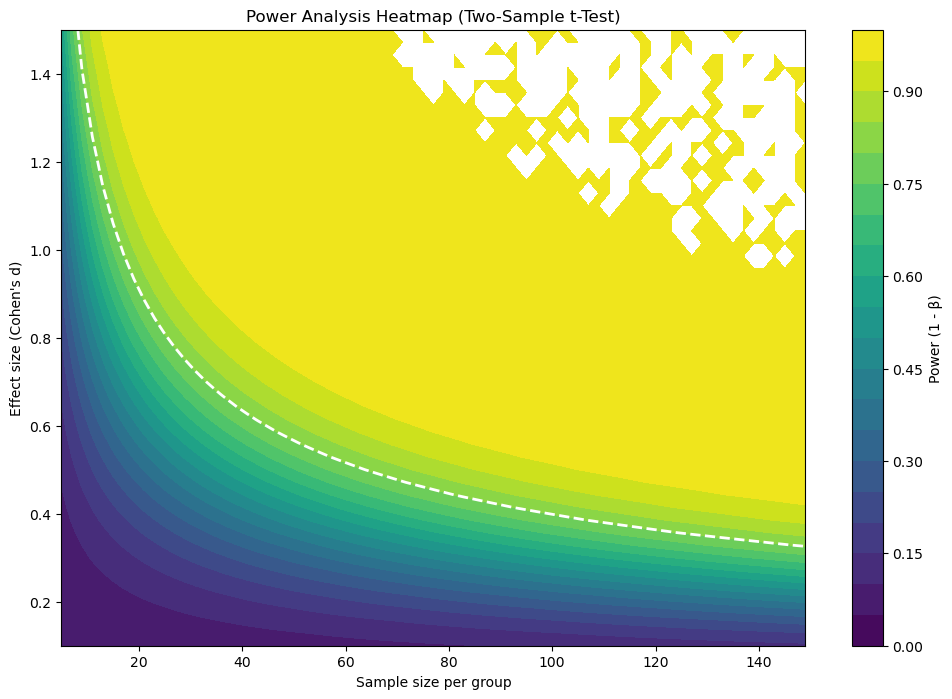

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Grid of sample sizes and effect sizes
sample_sizes = np.arange(5, 150, 2)
effect_sizes = np.linspace(0.1, 1.5, 50)

# Compute power matrix
power_matrix = np.zeros((len(effect_sizes), len(sample_sizes)))

for i, es in enumerate(effect_sizes):
    for j, n in enumerate(sample_sizes):
        power_matrix[i, j] = power_ttest_two_sample(alpha, es, n)

# Plotting
plt.figure(figsize=(12, 8))
X, Y = np.meshgrid(sample_sizes, effect_sizes)
cp = plt.contourf(X, Y, power_matrix, levels=np.linspace(0, 1, 21), cmap="viridis")
plt.colorbar(cp, label="Power (1 - β)")
plt.xlabel("Sample size per group")
plt.ylabel("Effect size (Cohen's d)")
plt.title("Power Analysis Heatmap (Two-Sample t-Test)")
plt.contour(X, Y, power_matrix, levels=[0.8], colors='white', linestyles='--', linewidths=2)
plt.show()


In [115]:
from statsmodels.stats.power import TTestIndPower

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size=0.1, alpha=0.05, power=0.8)
print(f"Required sample size per group for 80% power: {int(sample_size)}")

Required sample size per group for 80% power: 1570


You never “know” the true effect size before running the experiment.
You have to assume, estimate, or hypothesize it based on:

- Domain knowledge
- Prior studies or historical data
- Business constraints
- Minimal Detectable Effect (MDE)

For example, if a new ad design increases conversion by at least 2 percentage points, it justifies rollout.
You translate that into Cohen’s d and power your study for that.

| Term used   | In this t-test context, it means      |
| ----------- | ------------------------------------- |
| effect size | Cohen’s d                             |
| Cohen’s d   | standardized difference between means |


**Cohen's d:**

$$
d = \frac{\mu_1 - \mu_2}{\sigma}
$$


In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nct, t
import ipywidgets as widgets
from ipywidgets import interact

# Power calculation for two-sample t-test
def power_ttest_two_sample(alpha, effect_size, n_per_group):
    df = 2 * n_per_group - 2
    se = np.sqrt(2 / n_per_group)
    ncp = effect_size / se
    t_crit = t.ppf(1 - alpha/2, df)
    power = 1 - nct.cdf(t_crit, df, ncp) + nct.cdf(-t_crit, df, ncp)
    return power

# Interactive plotting function
def plot_power(effect_size, alpha, n_per_group):
    sample_sizes = np.arange(5, 300, 1)
    powers = [power_ttest_two_sample(alpha, effect_size, n) for n in sample_sizes]

    plt.figure(figsize=(10, 6))
    plt.plot(sample_sizes, powers, label=f'Effect size d={effect_size}')
    plt.axhline(0.8, color='gray', linestyle='--', label='80% power target')
    plt.axvline(n_per_group, color='red', linestyle='--', label=f'Chosen N = {n_per_group}')
    
    # Compute actual power at selected sample size
    actual_power = power_ttest_two_sample(alpha, effect_size, n_per_group)
    plt.scatter(n_per_group, actual_power, color='red')
    plt.text(n_per_group + 2, actual_power, f"{actual_power:.2f}", color='red')

    plt.ylim(0, 1.05)
    plt.xlabel("Sample size per group")
    plt.ylabel("Power (1 - β)")
    plt.title("Power Curve for Two-Sample t-Test")
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive sliders
interact(
    plot_power,
    effect_size=widgets.FloatSlider(value=0.5, min=0.1, max=1.5, step=0.05, description='Effect Size'),
    alpha=widgets.FloatSlider(value=0.05, min=0.001, max=0.2, step=0.005, description='Alpha'),
    n_per_group=widgets.IntSlider(value=50, min=5, max=300, step=1, description='N per group')
);


interactive(children=(FloatSlider(value=0.5, description='Effect Size', max=1.5, min=0.1, step=0.05), FloatSli…

## 8. The Central Limit Theorem

The **Central Limit Theorem (CLT)** states that, regardless of the population's distribution, the distribution of sample means will approach a normal distribution as the sample size increases. 
This is a cornerstone of inferential statistics and explains why many statistical methods assume normality — even when the underlying data is not normally distributed.

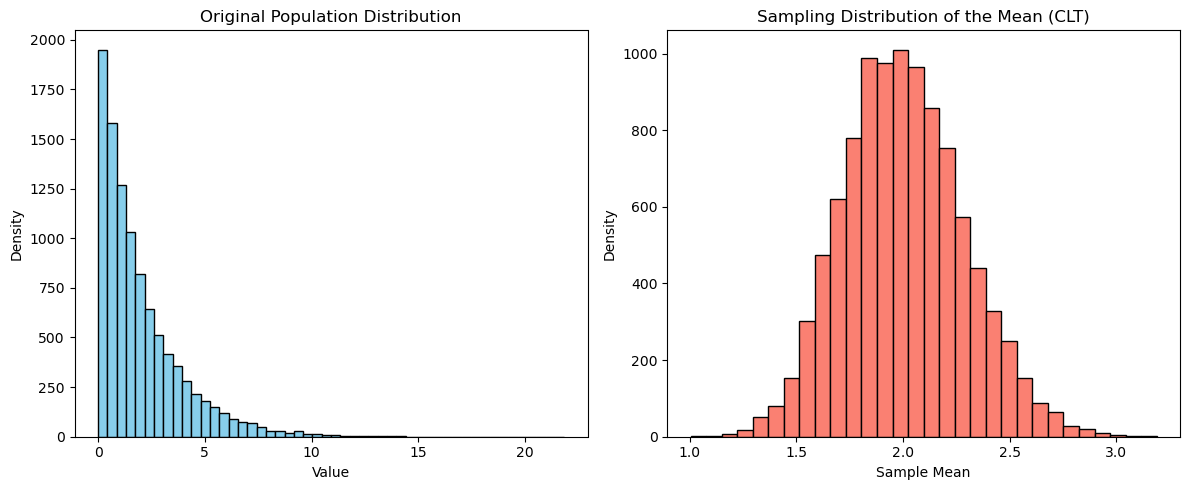

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Generate population data (exponential distribution)
population = np.random.exponential(scale=2.0, size=10000)

# Simulate sampling distribution of the mean
sample_means = [np.mean(np.random.exponential(scale=2.0, size=50)) for _ in range(10000)]

# Plot both distributions side by side
plt.figure(figsize=(12, 5))

# Original population distribution
plt.subplot(1, 2, 1)
plt.hist(population, bins=50, color='skyblue', edgecolor='k', density=False)
plt.title('Original Population Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

# Sampling distribution of the mean
plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=30, color='salmon', edgecolor='k', density=False)
plt.title('Sampling Distribution of the Mean (CLT)')
plt.xlabel('Sample Mean')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


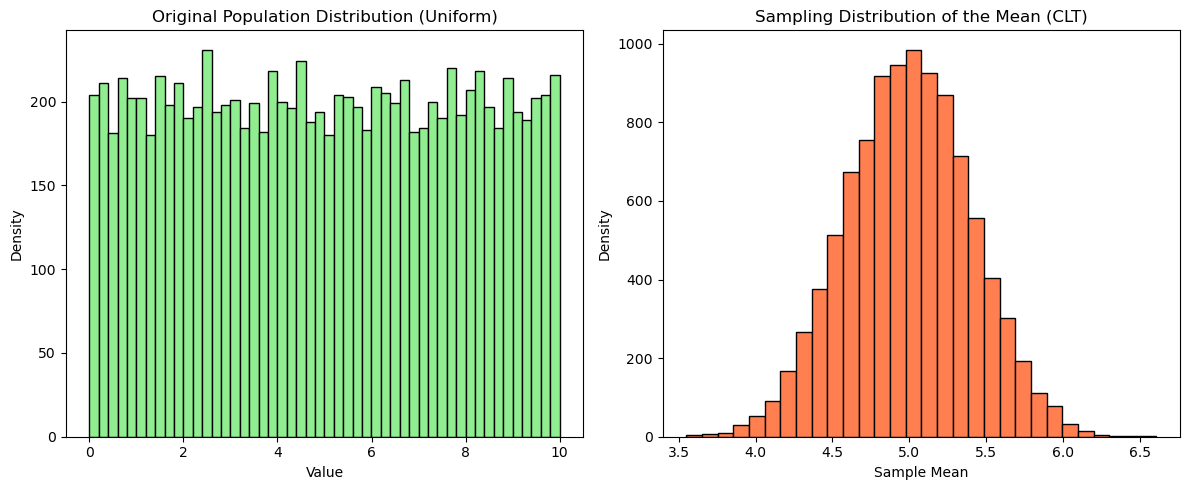

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Generate population data (uniform distribution)
population_uniform = np.random.uniform(low=0, high=10, size=10000)

# Simulate sampling distribution of the mean from uniform data
sample_means_uniform = [np.mean(np.random.uniform(low=0, high=10, size=50)) for _ in range(10000)]

plt.figure(figsize=(12, 5))

# Original uniform population distribution
plt.subplot(1, 2, 1)
plt.hist(population_uniform, bins=50, color='lightgreen', edgecolor='k', density=False)
plt.title('Original Population Distribution (Uniform)')
plt.xlabel('Value')
plt.ylabel('Density')

# Sampling distribution of the mean from uniform data
plt.subplot(1, 2, 2)
plt.hist(sample_means_uniform, bins=30, color='coral', edgecolor='k', density=False)
plt.title('Sampling Distribution of the Mean (CLT)')
plt.xlabel('Sample Mean')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


### How is this useful in a real world scenario?

1. You run an online campaign comparing two versions of a webpage (A and B). The raw engagement times of users are highly skewed because some users browse very briefly, while others stay much longer. Thanks to CLT, when you take sufficiently large random samples of engagement times, the sampling distribution of the average engagement time approaches a normal distribution. This lets you apply t-tests to decide which webpage performs better, even if individual data points are not normal.

2. Pollsters collect responses from random samples of voters. Individual opinions can vary widely and follow unknown or skewed distributions. However, the sample mean of, say, approval ratings will tend to be normally distributed (if the sample size is large enough), enabling confidence intervals and hypothesis tests to infer the population’s true sentiment.

#### Question time

## 9. Standard Deviation vs Standard Error



- **Standard Deviation (SD)** measures the spread of individual data points around the sample mean:

$$
s = \sqrt{\frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2}
$$

- **Standard Error (SE)** measures the variability of the sample mean estimate across different samples:

$$
SE = \frac{s}{\sqrt{n}}
$$

where:  
- $ n $ is the sample size  
- $ x_i $ are the individual observations  
- $ \bar{x} $ is the sample mean  
- $ s $ is the sample standard deviation

As the sample size $ n $ increases, the standard error decreases, reflecting more precise estimates of the population mean.

---

In essence, SD describes how spread out individual observations are, whereas SE describes the precision of the sample mean as an estimate of the population mean.

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

def plot_standard_deviation(n=30):
    np.random.seed(42)
    samples = [np.random.normal(0, 1, n) for _ in range(1000)]
    stds = [np.std(s, ddof=1) for s in samples]

    plt.figure(figsize=(8, 5))
    plt.hist(stds, bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Standard Deviation Distribution (sample size = {n})')
    plt.xlabel('Standard Deviation')
    plt.ylabel('Frequency')
    plt.show()

def plot_standard_error(n=30):
    np.random.seed(42)
    samples = [np.random.normal(0, 1, n) for _ in range(1000)]
    stds = [np.std(s, ddof=1) for s in samples]
    ses = [sd / np.sqrt(n) for sd in stds]

    plt.figure(figsize=(8, 5))
    plt.hist(ses, bins=30, alpha=0.7, color='orange', edgecolor='black')
    plt.title(f'Standard Error Distribution (sample size = {n})')
    plt.xlabel('Standard Error')
    plt.ylabel('Frequency')
    plt.show()

slider = IntSlider(value=30, min=5, max=1000, step=1, description='Sample Size (n)')

print("### Standard Deviation")
interact(plot_standard_deviation, n=slider)

print("### Standard Error")
interact(plot_standard_error, n=slider)


### Standard Deviation


interactive(children=(IntSlider(value=30, description='Sample Size (n)', max=1000, min=5), Output()), _dom_cla…

### Standard Error


interactive(children=(IntSlider(value=30, description='Sample Size (n)', max=1000, min=5), Output()), _dom_cla…

<function __main__.plot_standard_error(n=30)>

Going back to our previous real-world scenario of analyzing A/B test results for a marketing campaign:

- The standard deviation of engagement times helps understand variability in user behavior.

- The standard error of the mean shows how accurate your average engagement estimate is, which impacts the calculation of test statistics and p-values.

- The concepts justify why sample size matters — bigger samples reduce SE, increase statistical power, and give more reliable results.

#### Question time

### Hometask
Using the dataset contatining data of conversions of users on page with older design and page with newer design, linked below do the following
https://www.kaggle.com/datasets/zhangluyuan/ab-testing/data

1. Run a Hypothesis test under p-value of 0.05. Use single-tailed and two-tailed t-test. Calculate whether we can reject H0 (design of the page did not change conversion)
2. Calculate the effect size from observation, using Cohen's D. Using the calculated effect size, calculate the sample size that is needed to reject H0 with power of 0.9 and p-value of 0.05. Use both one-sided and two-sided power calculation to obtain sample sizes in each case. 

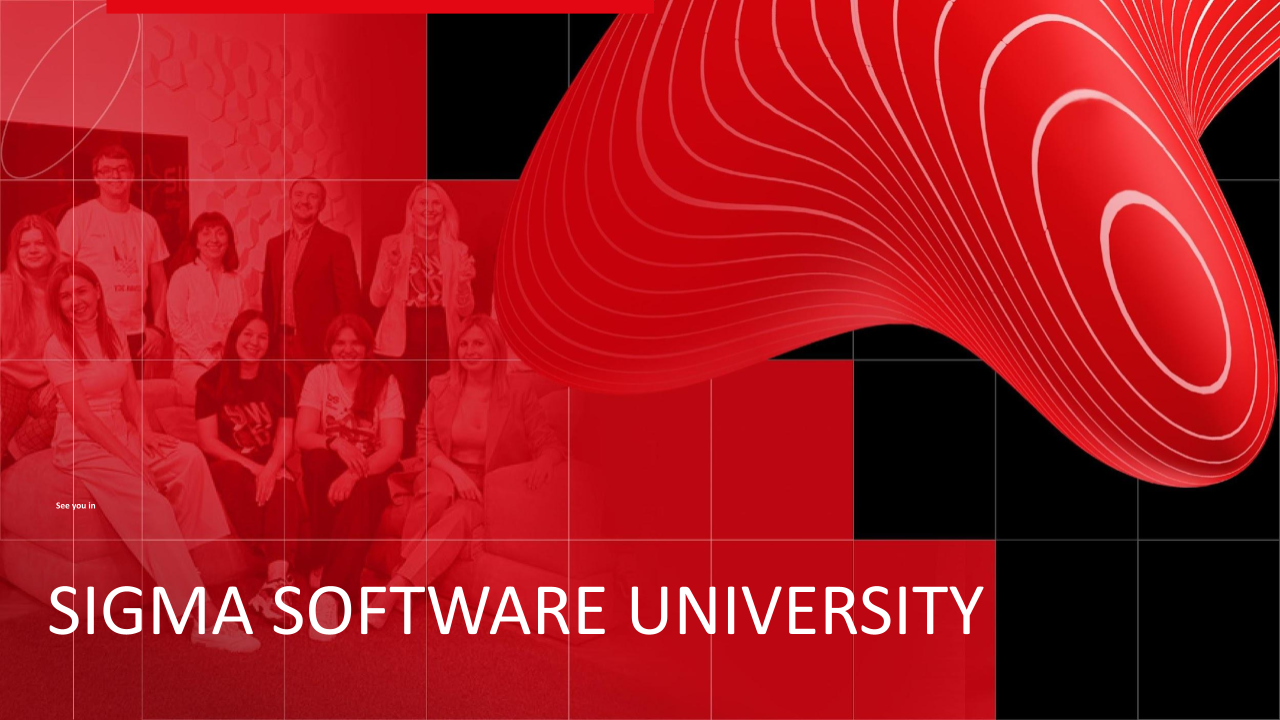